<a href="https://www.kaggle.com/code/sacrum/ml-labs-04-auto-mpg-regression?scriptVersionId=178243486" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

The notebook uses `pandas` for data manipulation, `seaborn` and `matplotlib` for visualization, and `sklearn` for `linear regression` and `regularization` techniques (`Lasso` and `Ridge`). It includes data loading, processing, visualization, model training, and evaluation on the `Auto-MPG dataset`.

In [1]:
# Import Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Data Loading

In [2]:
data_path = "/kaggle/input/autompg-dataset/auto-mpg.csv"

In [3]:
df = pd.read_csv(data_path)

print("Shape:", df.shape)
df.head(5)

Shape: (398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


# Data Processing

### Basic Information

In [4]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [7]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [8]:
df.duplicated().sum()

0

### Processing

handle missing values

In [9]:
df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [10]:
df['horsepower'] = df['horsepower'].replace('?', np.nan)
df['horsepower'] = df['horsepower'].astype(float)
df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)

remove unnecessary columns

In [11]:
df = df.drop('car name', axis=1)

convert categorical data to one-hot-encoding

In [12]:
df = pd.get_dummies(df, columns=['origin'])

check datatypes in columns

In [13]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin_1           bool
origin_2           bool
origin_3           bool
dtype: object

In [14]:
df['origin_1'] = df['origin_1'].astype(int)
df['origin_2'] = df['origin_2'].astype(int)
df['origin_3'] = df['origin_3'].astype(int)

### Visualization

Plot histograms for distribution in columns

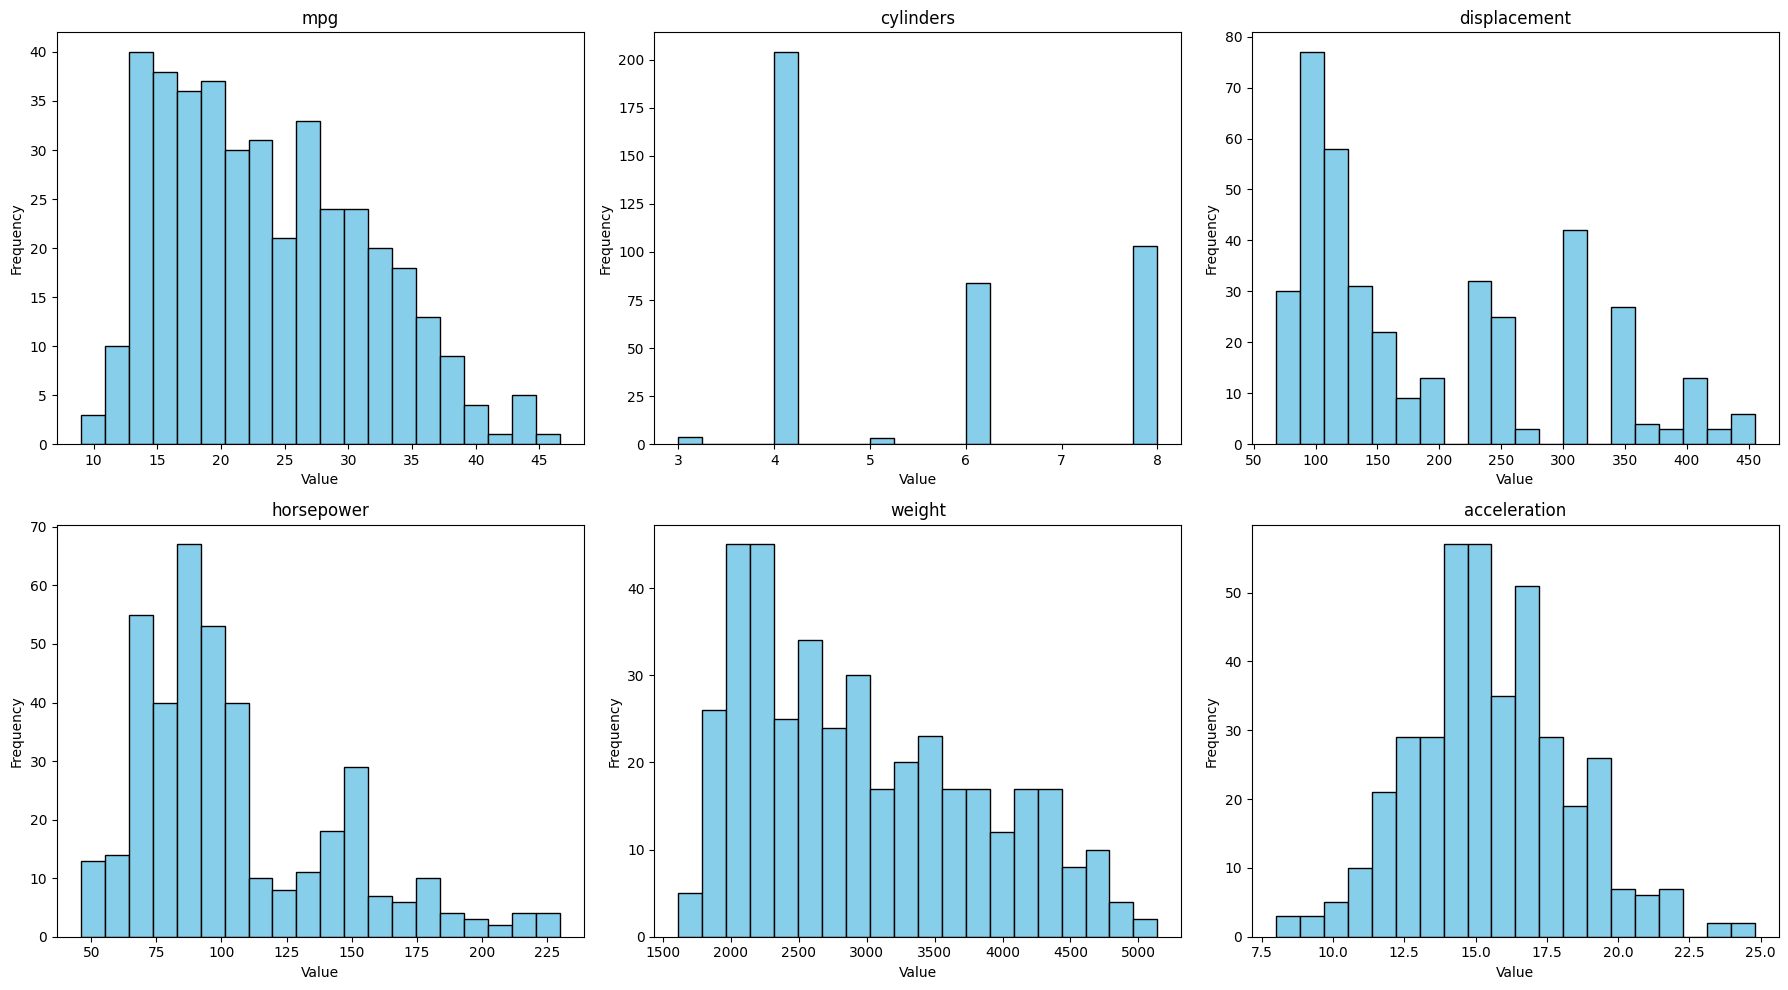

In [15]:
cols_for_hist = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']

fig, axs = plt.subplots(2, 3, figsize=(18, 10))

for i, col in enumerate(cols_for_hist):
    ax = axs[i//3, i%3]
    ax.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


Draw Correlation Matrix

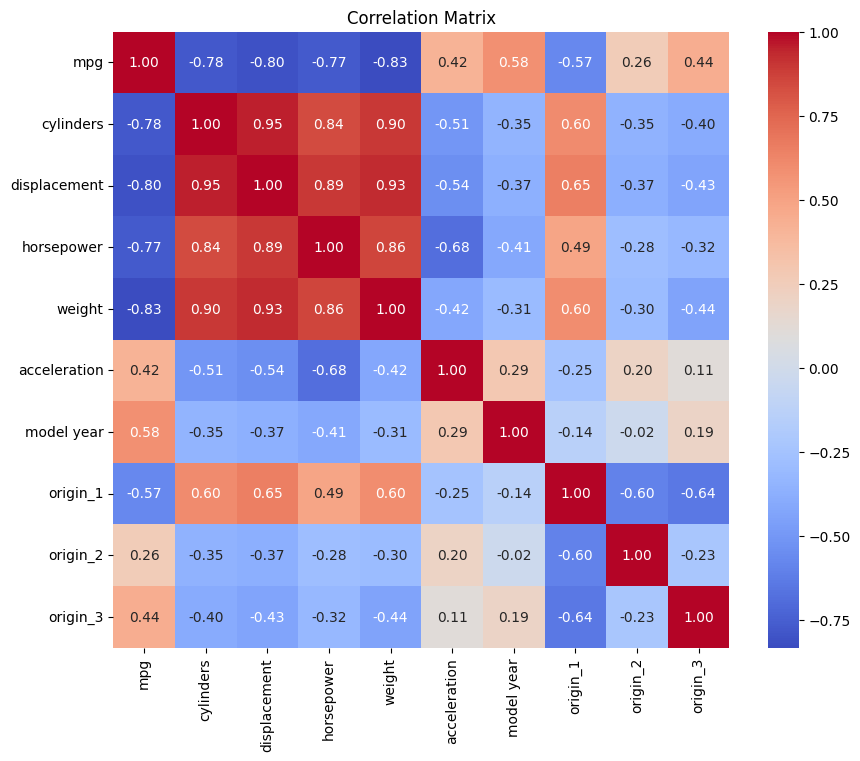

In [16]:
corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True, fmt=".2f", 
            xticklabels=df.columns, yticklabels=df.columns)
plt.title('Correlation Matrix')
plt.show()

Pairplot between columns

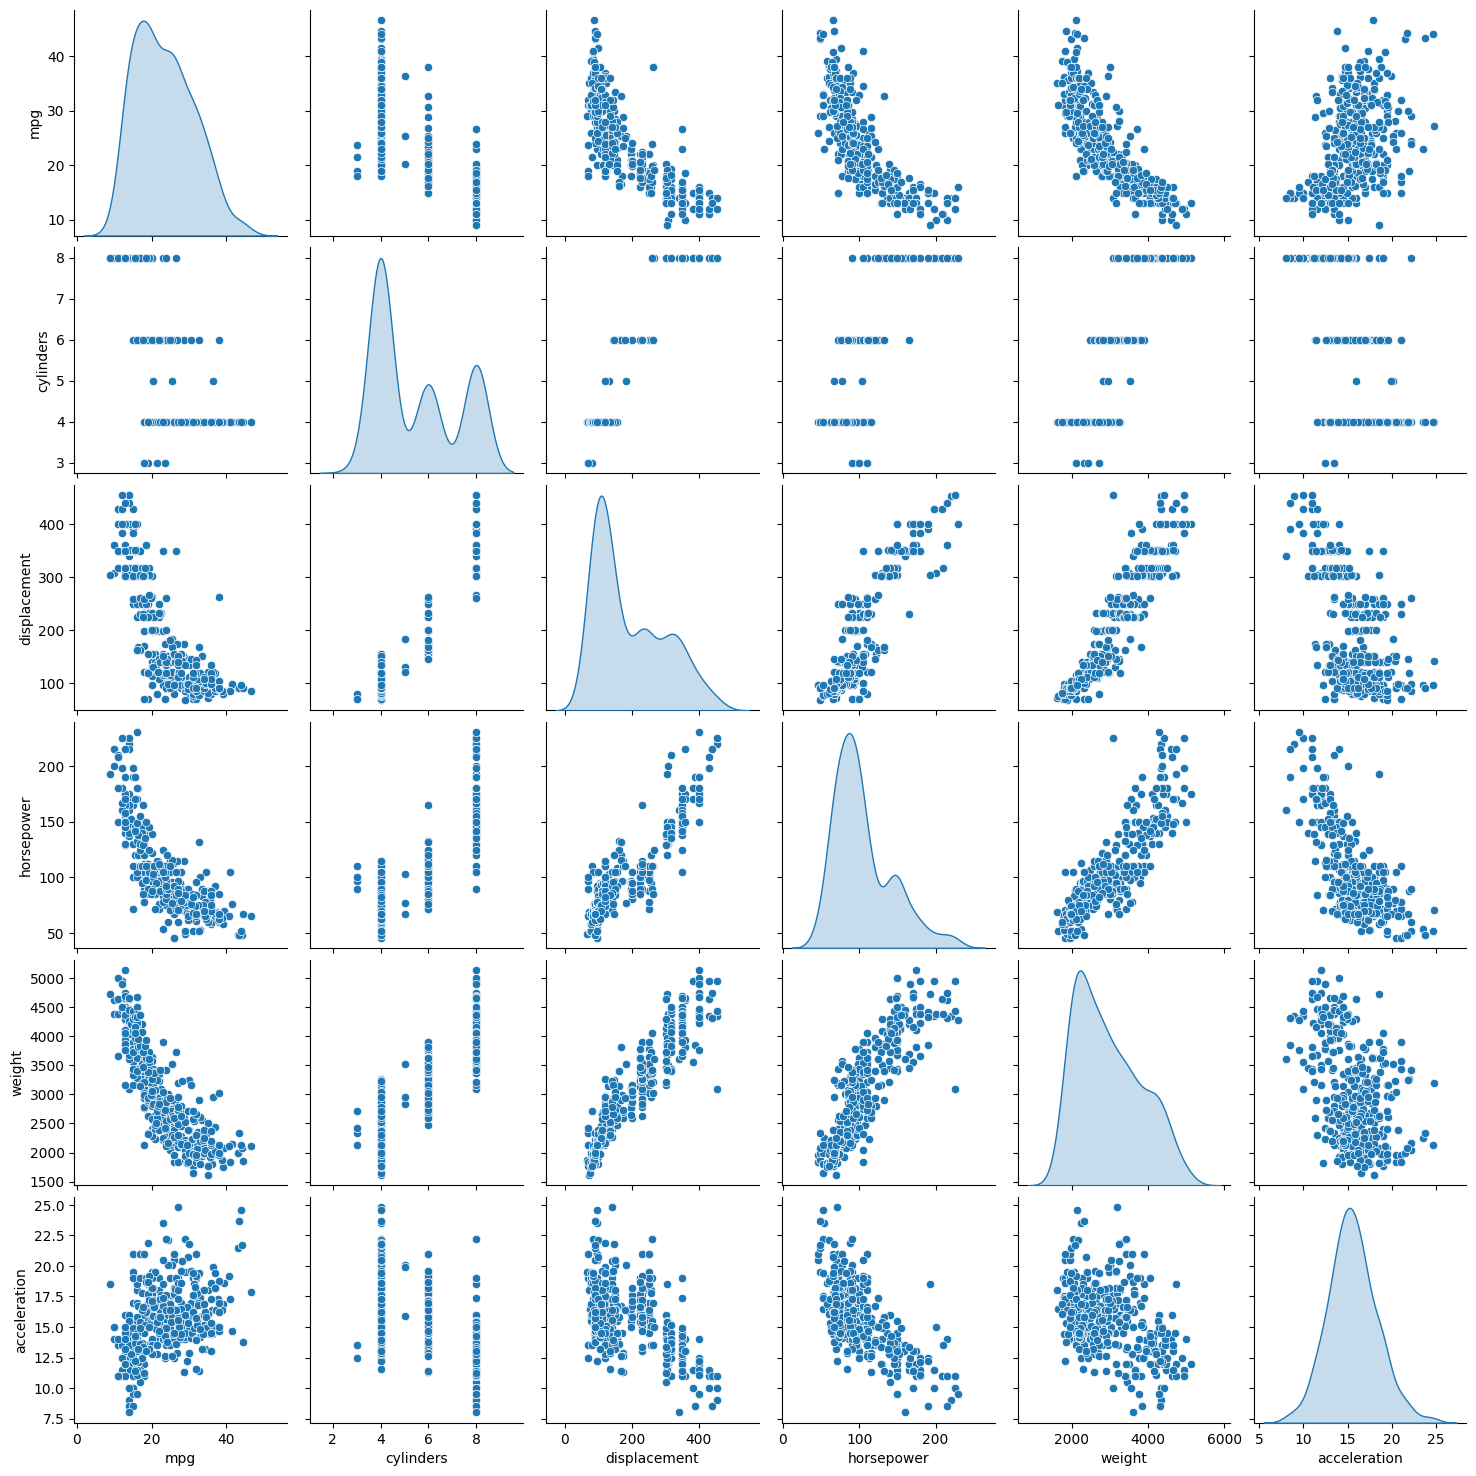

In [17]:
sns.pairplot(df[cols_for_hist], diag_kind='kde')

# Data Split

In [18]:
X = df
y = X.pop("mpg")

X.shape, y.shape

((398, 9), (398,))

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
	X,
	y,
	test_size=0.3,
	random_state=42
)

print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)
print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)

X_train.shape: (278, 9)
X_test.shape: (120, 9)
y_train.shape: (278,)
y_test.shape: (120,)


# Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

# Initiate model
lr = LinearRegression()

# Fit on Train Data
lr.fit(X_train, y_train)

# Predictions on Test Data
preds = lr.predict(X_test)

Metrics

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, preds)

# Calculate R-squared
r_squared = r2_score(y_test, preds)

print("Mean Squared Error (MSE):", mse)
print("R-squared:", r_squared)

Mean Squared Error (MSE): 9.199829719898036
R-squared: 0.8397001030031429


Regression Weights Against Columns

In [22]:
for w, c in zip(lr.coef_, df.columns):
	print(f"\nColumn: {c}\nWeight: {w}")


Column: cylinders
Weight: 0.013500678957893293

Column: displacement
Weight: 0.01238643130785483

Column: horsepower
Weight: -0.005816272399969581

Column: weight
Weight: -0.006787764366854149

Column: acceleration
Weight: 0.1234886985624768

Column: model year
Weight: 0.8160123684104327

Column: origin_1
Weight: -2.006378925894672

Column: origin_2
Weight: 1.0449959691275332

Column: origin_3
Weight: 0.961382956767137


Plot Preds against Actual Values

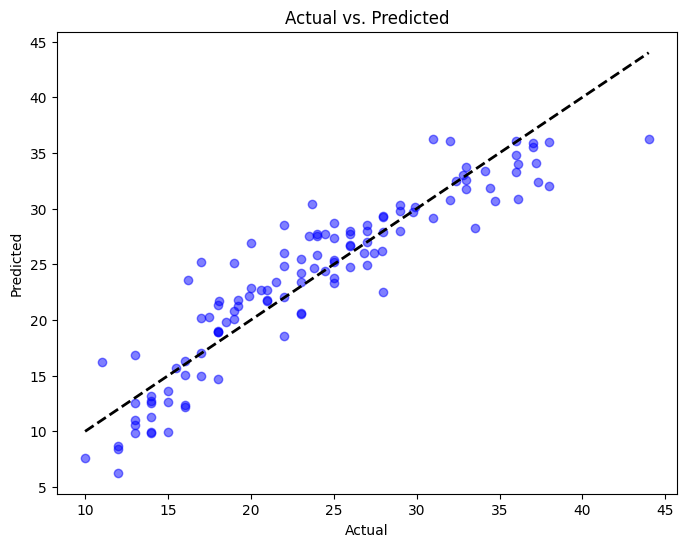

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, preds, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

# Regression with Regularization

In [24]:
from sklearn.linear_model import Lasso, Ridge

In [25]:
# Initiate Lasso model
lasso = Lasso(alpha=0.1)  # You can set the alpha parameter as per your requirement

# Fit Lasso on Train Data
lasso.fit(X_train, y_train)

# Predictions on Test Data using Lasso
lasso_preds = lasso.predict(X_test)

In [26]:
# Initiate Ridge model
ridge = Ridge(alpha=10)

# Fit Ridge on Train Data
ridge.fit(X_train, y_train)

# Predictions on Test Data using Ridge
ridge_preds = ridge.predict(X_test)

GridSearch to find `alpha`

In [27]:
from sklearn.model_selection import GridSearchCV

# Define the range of alpha values to search
alphas = np.logspace(-4, 4, 9)

In [28]:
# For Lasso
lasso_param_grid = {'alpha': alphas}
lasso_grid_search = GridSearchCV(Lasso(), param_grid=lasso_param_grid, cv=5)
lasso_grid_search.fit(X_train, y_train)

print("Best alpha for Lasso:", lasso_grid_search.best_params_['alpha'])

Best alpha for Lasso: 0.1


In [29]:
# For Ridge
ridge_param_grid = {'alpha': alphas}
ridge_grid_search = GridSearchCV(Ridge(), param_grid=ridge_param_grid, cv=5)
ridge_grid_search.fit(X_train, y_train)

print("Best alpha for Ridge:", ridge_grid_search.best_params_['alpha'])

Best alpha for Ridge: 10.0


Metrics

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, lasso_preds)

# Calculate R-squared
r_squared = r2_score(y_test, lasso_preds)

print("(Lasso) Mean Squared Error (MSE):", mse)
print("(Lasso) R-squared:", r_squared)

(Lasso) Mean Squared Error (MSE): 9.08972794923705
(Lasso) R-squared: 0.8416185409561796


In [31]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, ridge_preds)

# Calculate R-squared
r_squared = r2_score(y_test, ridge_preds)

print("(Ridge) Mean Squared Error (MSE):", mse)
print("(Ridge) R-squared:", r_squared)

(Ridge) Mean Squared Error (MSE): 9.154084484290687
(Ridge) R-squared: 0.8404971782511874


Regression Weights Against Columns

In [32]:
for l, r, c in zip(lasso.coef_, ridge.coef_, df.columns):
	print(f"\nColumn: {c}\nLasso Weight: {l}\nRidge Weight: {r}")


Column: cylinders
Lasso Weight: 0.0
Ridge Weight: 0.04734418002701292

Column: displacement
Lasso Weight: 0.007641092976791144
Ridge Weight: 0.009270015286182277

Column: horsepower
Lasso Weight: -0.004206257398867365
Ridge Weight: -0.0034355700968151897

Column: weight
Lasso Weight: -0.006630333149885932
Ridge Weight: -0.006766212924646204

Column: acceleration
Lasso Weight: 0.09141545079310157
Ridge Weight: 0.12154860675248869

Column: model year
Lasso Weight: 0.7997248331493036
Ridge Weight: 0.8100699380332435

Column: origin_1
Lasso Weight: -2.1708562853513493
Ridge Weight: -1.6707273966858385

Column: origin_2
Lasso Weight: 0.0
Ridge Weight: 0.861076585541183

Column: origin_3
Lasso Weight: 0.0
Ridge Weight: 0.8096508111446262


Plot Preds Against Actual Values

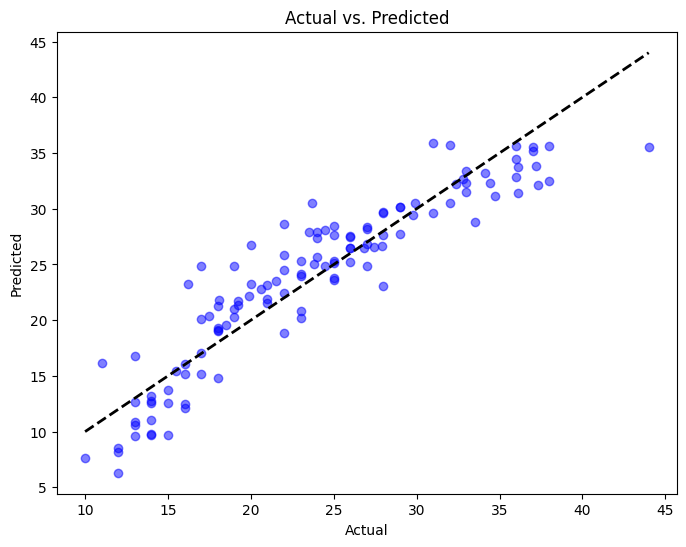

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, lasso_preds, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

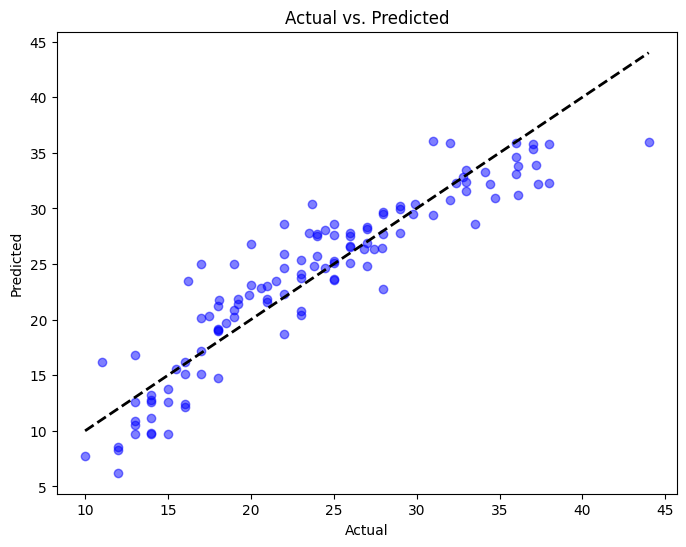

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, ridge_preds, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

**Find More Labs**

This lab is from my Machine Learning Course, that is a part of my [Software Engineering](https://seecs.nust.edu.pk/program/bachelor-of-software-engineering-for-fall-2021-onward) Degree at [NUST](https://nust.edu.pk).

The content in the provided list of notebooks covers a range of topics in **machine learning** and **data analysis** implemented from scratch or using popular libraries like **NumPy**, **pandas**, **scikit-learn**, **seaborn**, and **matplotlib**. It includes introductory materials on NumPy showcasing its efficiency for mathematical operations, **linear regression**, **logistic regression**, **decision trees**, **K-nearest neighbors (KNN)**, **support vector machines (SVM)**, **Naive Bayes**, **K-means** clustering, principle component analysis (**PCA**), and **neural networks** with **backpropagation**. Each notebook demonstrates practical implementation and application of these algorithms on various datasets such as the **California Housing** Dataset, **MNIST** dataset, **Iris** dataset, **Auto-MPG** dataset, and the **UCI Adult Census Income** dataset. Additionally, it covers topics like **gradient descent optimization**, model evaluation metrics (e.g., **accuracy, precision, recall, f1 score**), **regularization** techniques (e.g., **Lasso**, **Ridge**), and **data visualization**.

| Title                                                                                                                   | Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| ----------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| [01 - Intro to Numpy](https://www.kaggle.com/code/sacrum/ml-labs-01-intro-to-numpy)                                     | The notebook demonstrates NumPy's efficiency for mathematical operations like array `reshaping`, `sigmoid`, `softmax`, `dot` and `outer products`, `L1 and L2 losses`, and matrix operations. It highlights NumPy's superiority over standard Python lists in speed and convenience for scientific computing and machine learning tasks.                                                                                                                                                                                              |
| [02 - Linear Regression From Scratch](https://www.kaggle.com/code/sacrum/ml-labs-02-linear-regression-from-scratch)     | This notebook implements `linear regression` and `gradient descent` from scratch in Python using `NumPy`, focusing on predicting house prices with the `California Housing Dataset`. It defines functions for prediction, `MSE` calculation, and gradient computation. Batch gradient descent is used for optimization. The dataset is loaded, scaled, and split. `Batch, stochastic, and mini-batch gradient descents` are applied with varying hyperparameters. Finally, the MSEs of the predictions from each method are compared. |
| [03 - Logistic Regression from Scratch](https://www.kaggle.com/code/sacrum/ml-labs-03-logistic-regression-from-scratch) | This notebook outlines the implementation of `logistic regression` from scratch in Python using `NumPy`, including functions for prediction, loss calculation, gradient computation, and batch `gradient descent` optimization, applied to the `MNIST` dataset for handwritten digit recognition and `Iris` data. And also inclues metrics like `accuracy`, `precision`, `recall`, `f1 score`                                                                                                                                         |
| [04 - Auto-MPG Regression](https://www.kaggle.com/code/sacrum/ml-labs-04-auto-mpg-regression)                           | The notebook uses `pandas` for data manipulation, `seaborn` and `matplotlib` for visualization, and `sklearn` for `linear regression` and `regularization` techniques (`Lasso` and `Ridge`). It includes data loading, processing, visualization, model training, and evaluation on the `Auto-MPG dataset`.                                                                                                                                                                                                                           |
| [05 - Desicion Trees from Scratch](https://www.kaggle.com/code/sacrum/ml-labs-05-desicion-trees-from-scratch)           | In this notebook, `DecisionTree` algorithm has been implmented from scratch and applied on dummy dataset                                                                                                                                                                                                                                                                                                                                                                                                                              |
| [06 - KNN from Scratch](https://www.kaggle.com/code/sacrum/ml-labs-06-knn-from-scratch)                                 | In this notebook, `K-Nearest Neighbour` algorithm has been implemented from scratch and compared with KNN provided in scikit-learn package                                                                                                                                                                                                                                                                                                                                                                                            |
| [07 - SVM](https://www.kaggle.com/code/sacrum/ml-labs-07-svm)                                                           | This notebook implements `SVM classifier` on `Iris Dataset`                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| [08 - Naive Bayes](https://www.kaggle.com/code/sacrum/ml-labs-08-naive-bayes)                                           | This notebook trains `Naive Bayes` and compares it with other algorithms `Decision Trees`, `SVM` and `Logistic Regression`                                                                                                                                                                                                                                                                                                                                                                                                            |
| [09 - K-means](https://www.kaggle.com/code/sacrum/ml-labs-09-k-means)                                                   | In this notebook `K-means` algorithm has been implemented using `scikit-learn` and different values of `k` are compared to understand the `elbow method` in `Calinski Harabasz Scores`                                                                                                                                                                                                                                                                                                                                                |
| [10 - UCI Adult Census Income](https://www.kaggle.com/code/sacrum/ml-labs-10-uci-adult-census-income)                   | Here I have used the UCI Adult Income dataset and applied different machine learning algorithms to find the best model configuration for predicting salary from the given information                                                                                                                                                                                                                                                                                                                                                 |
| [11 - PCA](https://www.kaggle.com/code/sacrum/ml-labs-11-pca)                                                           | `Principle Component Analysis` implemented from scratch                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| [12 - Neural Networks](https://www.kaggle.com/code/sacrum/ml-labs-12-neural-networks)                                   | This code implements neural networks with back propagation from scratch                                                                                                                                                                                                                                                                                                                                                                                                                                                               |